<a href="https://colab.research.google.com/github/julianencisoizquierdo/Python_Time_Series/blob/main/Time_Series_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import os

# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)

In [47]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Time Series/Sample - Superstore.xls")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262.0,2,0.0,41.9
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9,3,0.0,219.6
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6,2,0.0,6.9
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.6,5,0.5,-383.0
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.4,2,0.2,2.5


## **EDA**

In [48]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [49]:
variables = ['Order Date', 'Category', 'Sales']
group_variables = variables[:2]
outcome_variable = variables[2]
base = df.groupby(group_variables)[outcome_variable].sum().reset_index()
base.head()

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.4
1,2011-01-05,Office Supplies,288.1
2,2011-01-06,Office Supplies,19.5
3,2011-01-07,Furniture,"2,573.8"
4,2011-01-07,Office Supplies,685.3


In [50]:
print("Columns:", base.columns)
print("Index:", base.index)

Columns: Index(['Order Date', 'Category', 'Sales'], dtype='object')
Index: RangeIndex(start=0, stop=2864, step=1)


In [51]:
base.dtypes

Order Date    datetime64[ns]
Category              object
Sales                float64
dtype: object

In [52]:
order_date = np.array(base['Order Date'])
category = np.array(base['Category'])
sales = np.array(base['Sales'])

print('Order Date', type(order_date), order_date.dtype)
print('Category', type(category), category.dtype)
print('Sales', type(sales), sales.dtype)

Order Date <class 'numpy.ndarray'> datetime64[ns]
Category <class 'numpy.ndarray'> object
Sales <class 'numpy.ndarray'> float64


In [53]:
order_date_monthly = np.array(order_date, dtype='datetime64[M]')
np.unique(order_date_monthly)

array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
      dtype='datetime64[M]')

In [54]:
len(np.unique(order_date_monthly))

48

In [55]:
print('\n Unique categories:')
print(base['Category'].unique())


 Unique categories:
['Office Supplies' 'Furniture' 'Technology']


In [56]:
base.set_index('Order Date', inplace = True)

In [57]:
base.head()

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3


In [58]:
print("Index: ", base.index)

Index:  DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-08', '2011-01-08',
               '2011-01-10', '2011-01-10',
               ...
               '2014-12-28', '2014-12-29', '2014-12-29', '2014-12-29',
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=2864, freq=None)


In [59]:
print(base[base['Category'] == 'Office Supplies']['2011':'2012-02'])

                   Category  Sales
Order Date                        
2011-01-04  Office Supplies   16.4
2011-01-05  Office Supplies  288.1
2011-01-06  Office Supplies   19.5
2011-01-07  Office Supplies  685.3
2011-01-08  Office Supplies   10.4
...                     ...    ...
2012-02-22  Office Supplies   79.4
2012-02-23  Office Supplies   37.8
2012-02-25  Office Supplies   25.9
2012-02-27  Office Supplies   20.5
2012-02-29  Office Supplies   58.7

[304 rows x 2 columns]


In [60]:
print('Day:', base.index.day, '\n')
print('Week:', base.index.strftime('%W'), '\n')

base['DayofWeek'] = base.index.dayofweek

Day: Index([ 4,  5,  6,  7,  7,  7,  8,  8, 10, 10,
       ...
       28, 29, 29, 29, 30, 30, 30, 31, 31, 31],
      dtype='int32', name='Order Date', length=2864) 

Week: Index(['01', '01', '01', '01', '01', '01', '01', '01', '02', '02',
       ...
       '51', '52', '52', '52', '52', '52', '52', '52', '52', '52'],
      dtype='object', name='Order Date', length=2864) 



## **Preparing Dataset for Further Analysis**

In [61]:
base.head()

,Category,Sales,DayofWeek
Order Date,,,
2011-01-04,Office Supplies,16.4,1
2011-01-05,Office Supplies,288.1,2
2011-01-06,Office Supplies,19.5,3
2011-01-07,Furniture,"2,573.8",4
2011-01-07,Office Supplies,685.3,4


In [62]:
base2 = base.reset_index()
sales_pivot = base2.pivot(index='Order Date', columns='Category', values='Sales')
sales_pivot.head()

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,NaN,16.4,NaN
2011-01-05,NaN,288.1,NaN
2011-01-06,NaN,19.5,NaN
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,NaN


In [63]:
sales_pivot[['Furniture', 'Office Supplies', 'Technology']].fillna(0)

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,0.0,16.4,0.0
2011-01-05,0.0,288.1,0.0
2011-01-06,0.0,19.5,0.0
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,0.0
...,...,...,...
2014-12-27,0.0,814.6,0.0
2014-12-28,0.0,13.2,164.4
2014-12-29,551.3,"1,091.2",14.9


## **Editing the Index**

In [64]:
print(sales_pivot.index)
print('\nUnique dates in our data: ', len(sales_pivot.index.unique()), 'Days')

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1238, freq=None)

Unique dates in our data:  1238 Days


In [65]:
print('\nUnique dates in our data: ', len(sales_pivot.index.unique()), 'Days')
our_date_range = sales_pivot.index.max() - sales_pivot.index.min()

print('Total days in our date range:', our_date_range.days, 'Days')


Unique dates in our data:  1238 Days
Total days in our date range: 1457 Days


In [66]:
new_index = pd.date_range(sales_pivot.index.min(), sales_pivot.index.max())
print(new_index)

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')


In [67]:
sales_new = sales_pivot.reindex(new_index, fill_value=0)
sales_new

Category,Furniture,Office Supplies,Technology
2011-01-04,NaN,16.4,NaN
2011-01-05,NaN,288.1,NaN
2011-01-06,NaN,19.5,NaN
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,NaN
...,...,...,...
2014-12-27,NaN,814.6,NaN
2014-12-28,NaN,13.2,164.4
2014-12-29,551.3,"1,091.2",14.9
2014-12-30,"2,330.7",282.4,302.4


In [68]:
sales_new.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

## **Sampling**

In [69]:
sales_weekly = sales_new.resample('W').sum()
print('Weekly Sales')
print(sales_weekly.head(), '\n')

sales_monthly = sales_new.resample('M').sum()
print('Monthly Sales')
print(sales_monthly.head(), '\n')

sales_quarterly = sales_new.resample('Q').sum()
print('Quarterly Sales')
print(sales_quarterly.head(), '\n')

sales_annual = sales_new.resample('Y').sum()
print('Annual Sales')
print(sales_annual.head())

Weekly Sales
Category    Furniture  Office Supplies  Technology
2011-01-09    2,650.5          1,019.8     1,147.9
2011-01-16    1,003.8          2,039.4       827.9
2011-01-23    1,747.3            871.1       824.1
2011-01-30      550.2            680.3       343.3
2011-02-06      290.7            502.7       649.9 

Monthly Sales
Category    Furniture  Office Supplies  Technology
2011-01-31    5,951.9          4,851.1     3,143.3
2011-02-28    2,130.3          1,071.7     1,608.5
2011-03-31   14,574.0          8,605.9    32,511.2
2011-04-30    7,944.8         11,155.1     9,195.4
2011-05-31    6,912.8          7,135.6     9,599.9 

Quarterly Sales
Category    Furniture  Office Supplies  Technology
2011-03-31   22,656.1         14,528.7    37,263.0
2011-06-30   28,063.7         31,243.7    27,231.3
2011-09-30   41,957.9         53,924.0    47,751.4
2011-12-31   64,515.1         52,080.0    63,032.6
2012-03-31   27,374.1         23,059.4    18,418.2 

Annual Sales
Category    Furnitur

In [70]:
sales_monthly_from_annual = sales_annual.resample('M')
sales_monthly_sum = sales_monthly_from_annual.sum()
sales_monthly_sum.head()

Category,Furniture,Office Supplies,Technology
2011-12-31,"157,192.9","151,776.4","175,278.2"
2012-01-31,0.0,0.0,0.0
2012-02-29,0.0,0.0,0.0
2012-03-31,0.0,0.0,0.0
2012-04-30,0.0,0.0,0.0


## **Linear and Spline interpolation**

In [71]:
print('Monthly from Annual Sales - Linear Interpolation')
print(sales_monthly_from_annual.interpolate(method='linear').head())

print('\nMonthly from Annual Sales - Spline Interpolation')
print(sales_monthly_from_annual.interpolate(method='spline', order=3).head())

Monthly from Annual Sales - Linear Interpolation
Category    Furniture  Office Supplies  Technology
2011-12-31  157,192.9        151,776.4   175,278.2
2012-01-31  158,303.3        150,564.5   174,236.8
2012-02-29  159,413.8        149,352.6   173,195.3
2012-03-31  160,524.2        148,140.7   172,153.9
2012-04-30  161,634.6        146,928.8   171,112.4

Monthly from Annual Sales - Spline Interpolation
Category    Furniture  Office Supplies  Technology
2011-12-31  157,192.9        151,776.4   175,278.2
2012-01-31  157,062.6        147,084.7   168,957.8
2012-02-29  157,200.9        143,355.5   164,096.2
2012-03-31  157,611.1        140,049.0   159,969.0
2012-04-30  158,251.0        137,493.3   156,975.1


In [72]:
sales_daily = sales_new.asfreq('D')
sales_businessday = sales_new.asfreq('B')
sales_hourly = sales_new.asfreq('h')
sales_hourly.head()

Category,Furniture,Office Supplies,Technology
2011-01-04 00:00:00,NaN,16.4,NaN
2011-01-04 01:00:00,NaN,NaN,NaN
2011-01-04 02:00:00,NaN,NaN,NaN
2011-01-04 03:00:00,NaN,NaN,NaN
2011-01-04 04:00:00,NaN,NaN,NaN


In [73]:
# Variable First Difference
print('Monthly Sales Change \n', sales_monthly.diff().head())

# Variable Percent Change
print('\nMonthly Sales % Change \n', sales_monthly.pct_change().head())

# Log Sales
print('\nlog(1+Monthly Sales) \n', np.log(1 +  sales_monthly).head())

# Add % change to original data:
sales_monthly.join(sales_monthly.pct_change().add_suffix('_%_Change')).head()

Monthly Sales Change 
 Category    Furniture  Office Supplies  Technology
2011-01-31        NaN              NaN         NaN
2011-02-28   -3,821.5         -3,779.4    -1,534.8
2011-03-31   12,443.6          7,534.2    30,902.7
2011-04-30   -6,629.1          2,549.2   -23,315.7
2011-05-31   -1,032.0         -4,019.5       404.4

Monthly Sales % Change 
 Category    Furniture  Office Supplies  Technology
2011-01-31        NaN              NaN         NaN
2011-02-28       -0.6             -0.8        -0.5
2011-03-31        5.8              7.0        19.2
2011-04-30       -0.5              0.3        -0.7
2011-05-31       -0.1             -0.4         0.0

log(1+Monthly Sales) 
 Category    Furniture  Office Supplies  Technology
2011-01-31        8.7              8.5         8.1
2011-02-28        7.7              7.0         7.4
2011-03-31        9.6              9.1        10.4
2011-04-30        9.0              9.3         9.1
2011-05-31        8.8              8.9         9.2


Category,Furniture,Office Supplies,Technology,Furniture_%_Change,Office Supplies_%_Change,Technology_%_Change
2011-01-31,"5,951.9","4,851.1","3,143.3",NaN,NaN,NaN
2011-02-28,"2,130.3","1,071.7","1,608.5",-0.6,-0.8,-0.5
2011-03-31,"14,574.0","8,605.9","32,511.2",5.8,7.0,19.2
2011-04-30,"7,944.8","11,155.1","9,195.4",-0.5,0.3,-0.7
2011-05-31,"6,912.8","7,135.6","9,599.9",-0.1,-0.4,0.0


## **Rolling Averages and Rolling Windows**

In [74]:
window_size = 7
rolling_window = sales_new.rolling(window_size)

print('Rolling Mean')
print(rolling_window.mean().dropna().head())

print('\nRolling St. Dev')
print(rolling_window.std().dropna().head())

print('\nCumulative Sales')
print(sales_new.cumsum().dropna().head())

Rolling Mean
Category    Furniture  Office Supplies  Technology
2011-11-05      903.5            641.1     1,797.2
2011-11-15      544.2            999.3       679.6
2011-11-16      553.3          1,009.0       629.6
2011-11-17    1,212.3          1,786.3       556.4
2011-11-18    1,229.5          1,250.6       402.3

Rolling St. Dev
Category    Furniture  Office Supplies  Technology
2011-11-05    1,277.2            520.6     2,026.6
2011-11-15      736.4          1,550.4       519.8
2011-11-16      733.0          1,547.6       533.7
2011-11-17    1,933.1          2,474.7       570.3
2011-11-18    1,942.5          2,201.5       326.0

Cumulative Sales
Category    Furniture  Office Supplies  Technology
2011-01-07    2,573.8          1,009.4     1,147.9
2011-01-09    2,650.5          1,019.8     1,147.9
2011-01-13    2,712.4          1,032.0     1,179.1
2011-01-14    3,592.4          3,059.2     1,825.9
2011-01-17    3,781.4          3,107.8     2,100.0


## **Visualization**

<Axes: title={'center': 'Weekly Sales'}>

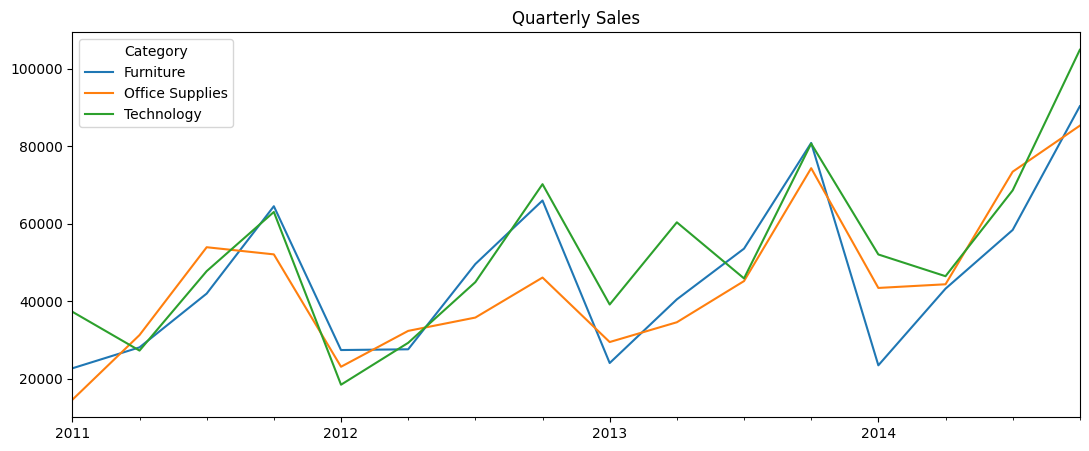

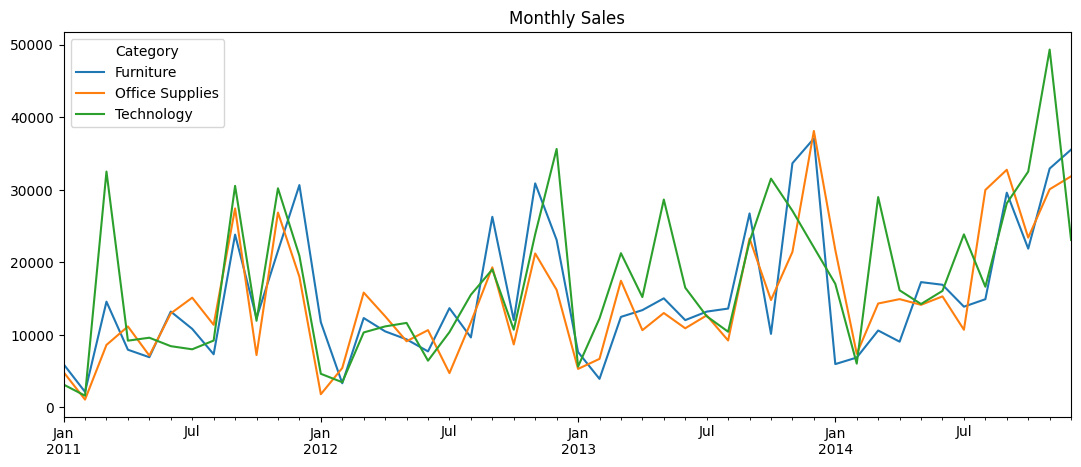

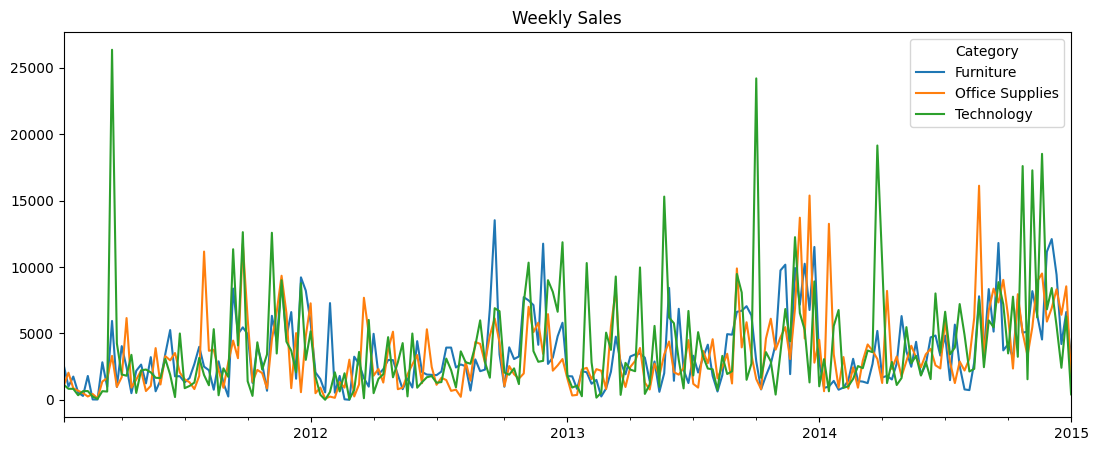

In [75]:
sales_quarterly.plot(figsize=plotsize, title='Quarterly Sales')

sales_monthly.plot(figsize=plotsize, title='Monthly Sales')

sales_weekly.plot(figsize=plotsize, title='Weekly Sales')

<Axes: title={'center': 'Quarterly Sales % Change'}>

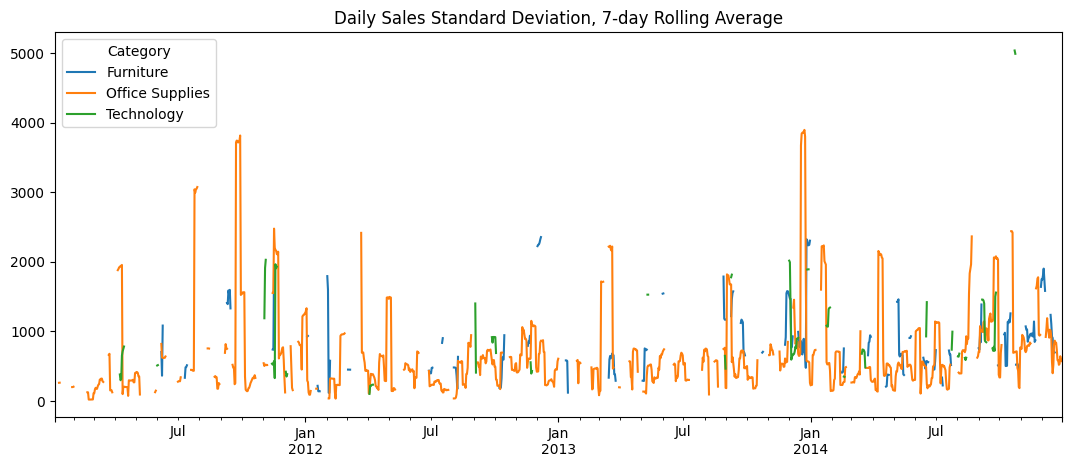

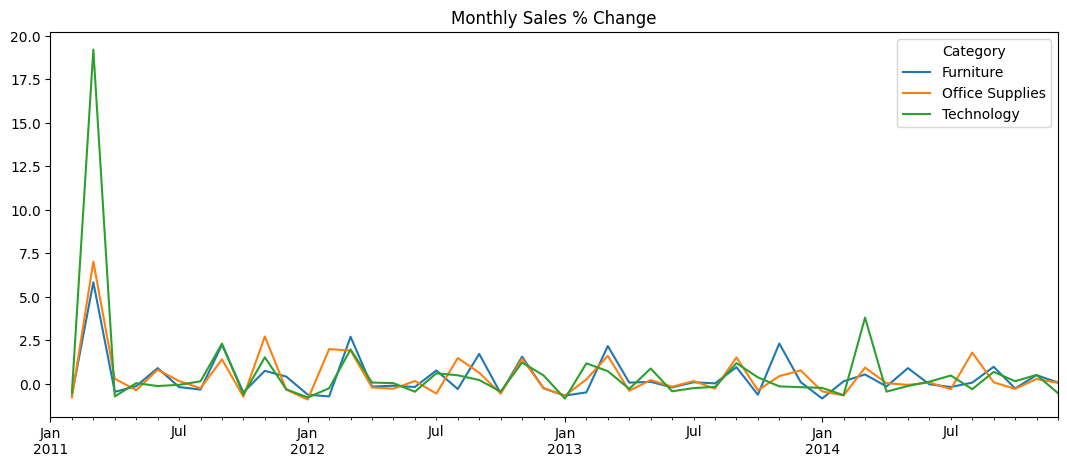

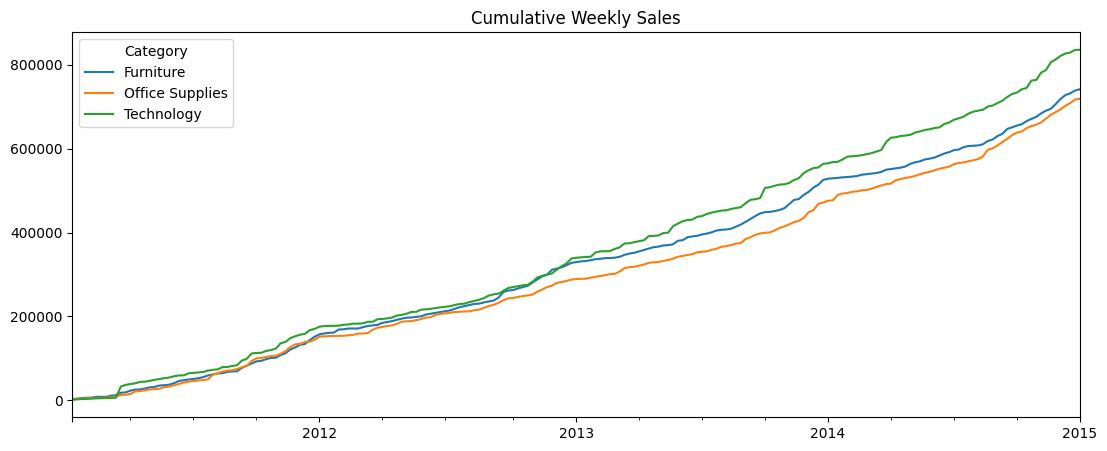

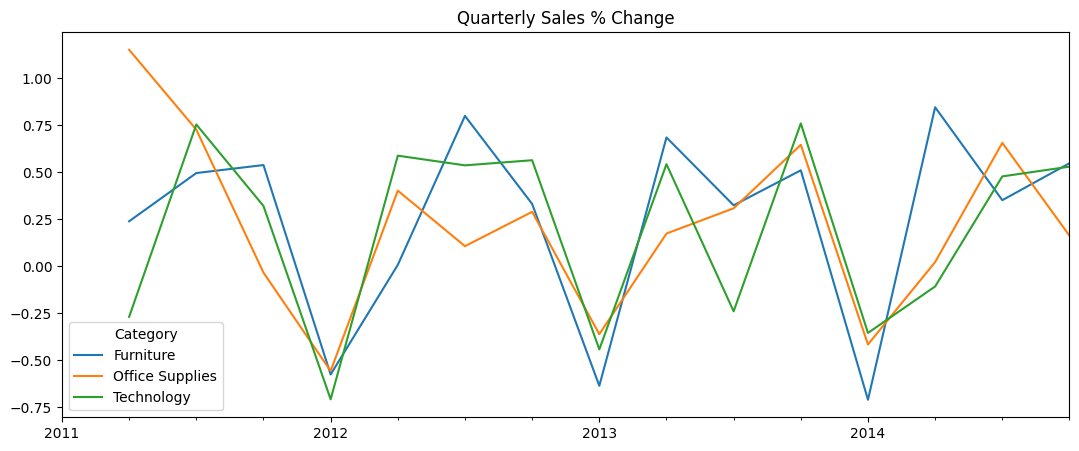

In [76]:
rolling_window.std().plot(figsize=plotsize, title='Daily Sales Standard Deviation, 7-day Rolling Average')

sales_monthly.pct_change().plot(figsize=plotsize, title='Monthly Sales % Change')

sales_weekly.cumsum().plot(figsize=plotsize, title='Cumulative Weekly Sales')

sales_quarterly.pct_change().plot(figsize=plotsize, title='Quarterly Sales % Change')

In [77]:
sales_new_2 = sales_new.fillna(0)
sales_new_2

Category,Furniture,Office Supplies,Technology
2011-01-04,0.0,16.4,0.0
2011-01-05,0.0,288.1,0.0
2011-01-06,0.0,19.5,0.0
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,0.0
...,...,...,...
2014-12-27,0.0,814.6,0.0
2014-12-28,0.0,13.2,164.4
2014-12-29,551.3,"1,091.2",14.9
2014-12-30,"2,330.7",282.4,302.4


## **Autocorrelation and Partial Autocorrelation**

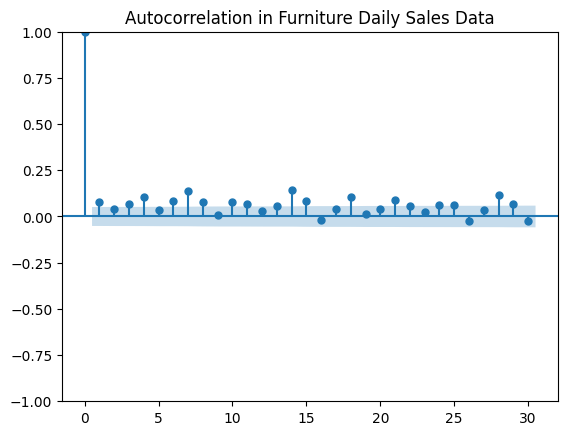

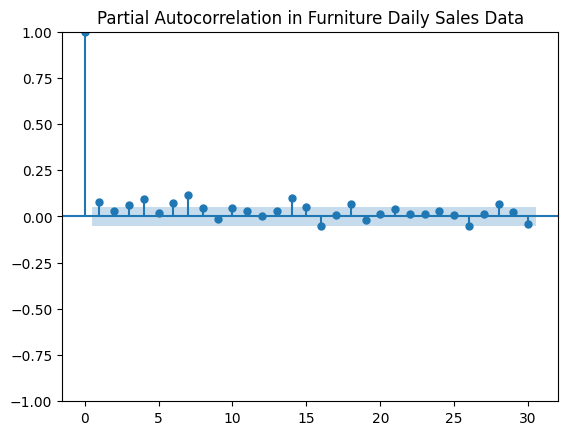

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

acf_plot = plot_acf(sales_new_2['Furniture'], lags=30, title='Autocorrelation in Furniture Daily Sales Data')

pacf_plot = plot_pacf(sales_new_2['Furniture'], lags=30, title='Partial Autocorrelation in Furniture Daily Sales Data')

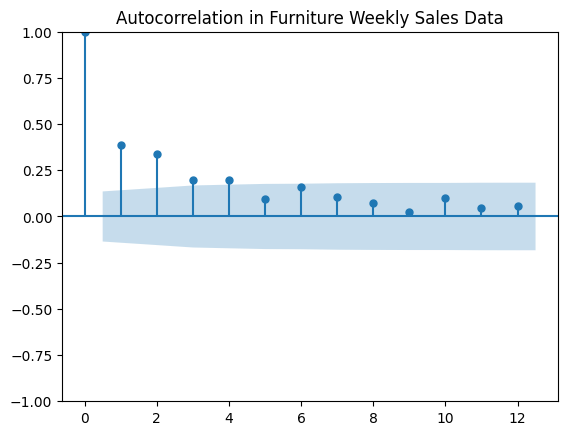

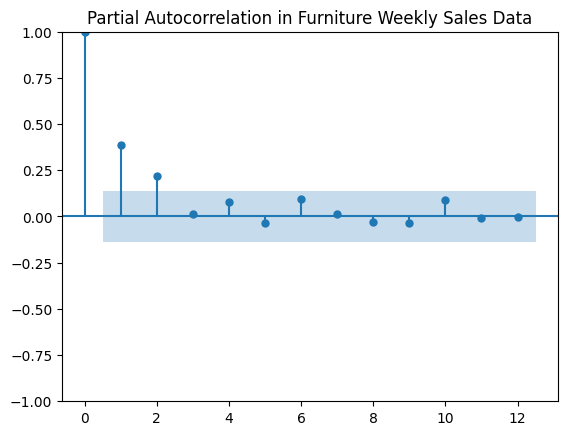

In [79]:
acf_plot = plot_acf(sales_weekly['Furniture'], lags=12, title='Autocorrelation in Furniture Weekly Sales Data')

pacf_plot = plot_pacf(sales_weekly['Furniture'], lags=12, title='Partial Autocorrelation in Furniture Weekly Sales Data')

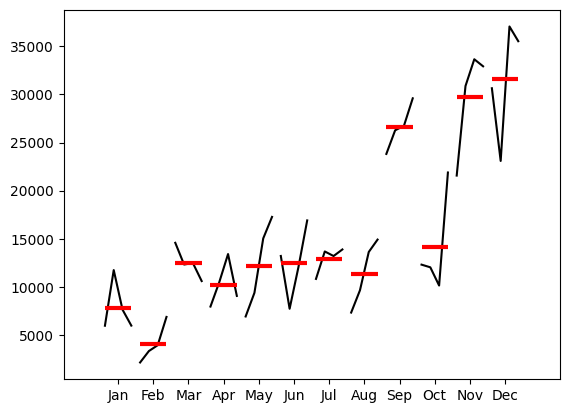

In [80]:
m_plot = month_plot(sales_monthly['Furniture'])


Quarterly Data Seasonal Plot


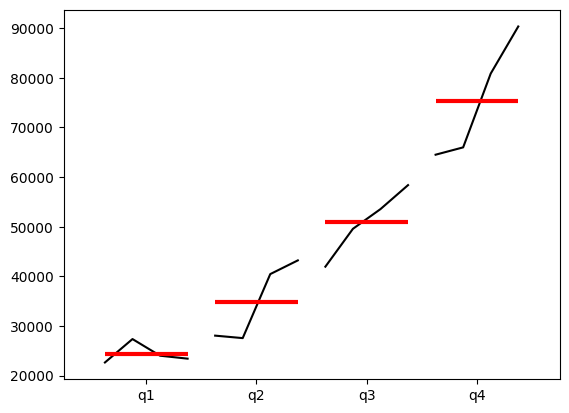

In [81]:
print('\nQuarterly Data Seasonal Plot')
q_plot = quarter_plot(sales_quarterly['Furniture'])

**Using the source data, set up Monthly data for Sales and Profit by Segment by either (1) Resampling or (2) Grouping data by Year and Month.**

In [82]:
new_vars = ['Segment','Profit','Order Date','Sales']
new_base = df[new_vars].set_index('Order Date')
prof_pivot = new_base.pivot_table(columns = 'Segment', index = 'Order Date').fillna(0)
prof_pivot

Profit                          Sales                      
Segment    Consumer Corporate Home Office Consumer Corporate Home Office
Order Date                                                              
2011-01-04      5.6       0.0         0.0     16.4       0.0         0.0
2011-01-05      0.0       0.0       -22.0      0.0       0.0        96.0
2011-01-06      4.9       0.0         0.0     19.5       0.0         0.0
2011-01-07      9.3       5.2       191.9     19.4      12.8       625.0
2011-01-08    -36.0       0.0         0.0     43.6       0.0         0.0
...             ...       ...         ...      ...       ...         ...
2014-12-27     20.6      21.6        -2.6     44.8     383.4         3.1
2014-12-28      0.0     -16.0         0.0      0.0      88.8         0.0
2014-12-29     10.5      21.1         0.2     45.4     150.1        31.1
2014-12-30     50.6      69.0         0.0    260.5     155.4         0.0
2014-12-31      8.5       5.5        56.5    117.5      17.3       209.3

[1238 rows x 6 columns]

In [83]:
prof_month = prof_pivot.resample('M').sum()
prof_month.head()

Profit                          Sales                      
Segment    Consumer Corporate Home Office Consumer Corporate Home Office
Order Date                                                              
2011-01-31    106.5       5.9       185.0  1,304.1     568.0       855.9
2011-02-28    228.3     126.0        37.9  1,442.7     464.1       104.1
2011-03-31    -26.5     131.3        73.7  3,777.8   1,988.4     4,439.9
2011-04-30    336.9     435.6       527.9  3,752.8   3,951.2     2,031.6
2011-05-31    484.0     873.0       -63.3  5,373.2   4,077.7       696.1

## **Comparing ACF and Seasonal Patterns**

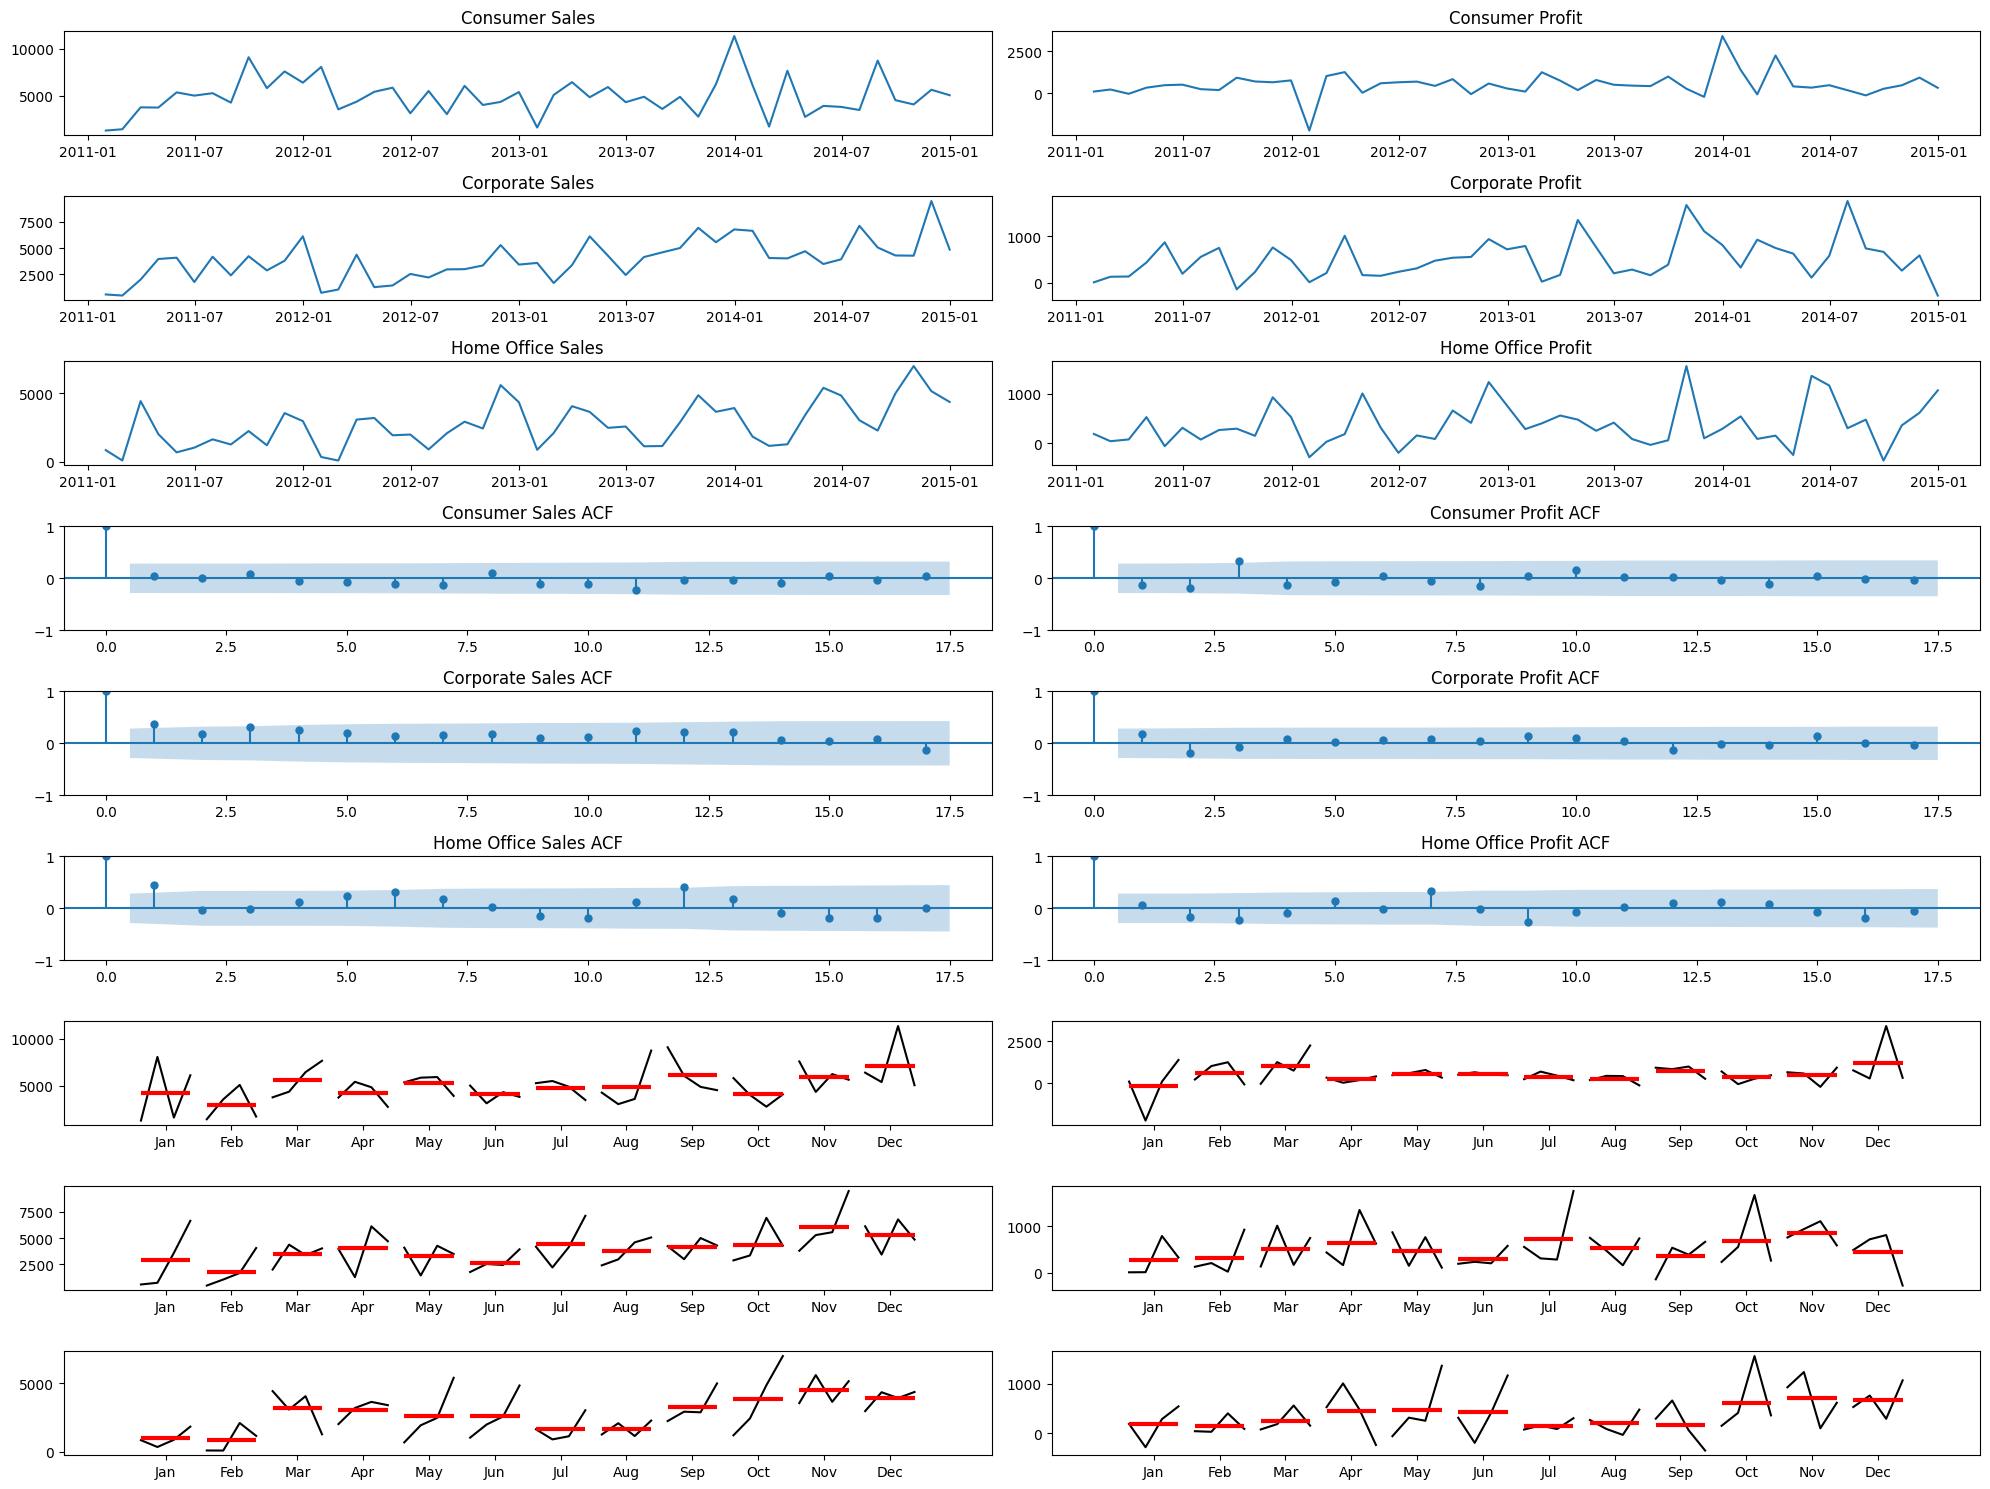

In [84]:
fig, axes = plt.subplots(9, 2, figsize=(20,15))
for i, cat in enumerate(['Consumer','Corporate','Home Office']):
    for j, money in enumerate(['Sales','Profit']):
        axes[i,j].plot(prof_month[money,cat])
        axes[i,j].title.set_text(cat+" "+money)
        plot_acf(prof_month[money,cat],ax=axes[i+3,j],title = cat+" "+money+" ACF")
        month_plot(prof_month[money,cat],ax=axes[i+6,j])

fig.tight_layout()
plt.show()

## **Exploring Other Variables**

In [85]:
cat_var = 'Region'
date_var = 'Order Date'
money_vars = ['Profit', 'Sales']

def monthly_eda(cat_var=cat_var,
                date_var=date_var,
                money_vars=money_vars):
    new_vars = [cat_var, date_var] + money_vars
    cats = list(df[cat_var].unique())
    num_cats = len(cats)
    new_base = df[new_vars].set_index(date_var)
    prof_pivot = new_base.pivot_table(columns=cat_var,index = date_var)
    prof_month = prof_pivot.resample('M').sum()
    prof_month.head()

    fig,axes = plt.subplots(num_cats*3, 2, figsize=(20, 5*num_cats),)
    for i, cat in enumerate(cats):
        for j,money in enumerate(money_vars):
            axes[i,j].plot(prof_month[money,cat])
            axes[i,j].title.set_text(cat+" "+money)
            fig = plot_acf(prof_month[money,cat], ax = axes[i+num_cats,j],title = cat+" "+money+" ACF")
            fig = month_plot(prof_month[money,cat], ax = axes[i+num_cats*2,j])
            axes[i+num_cats*2,j].title.set_text(cat + "Seasonality")

    fig.tight_layout()
    plt.show()

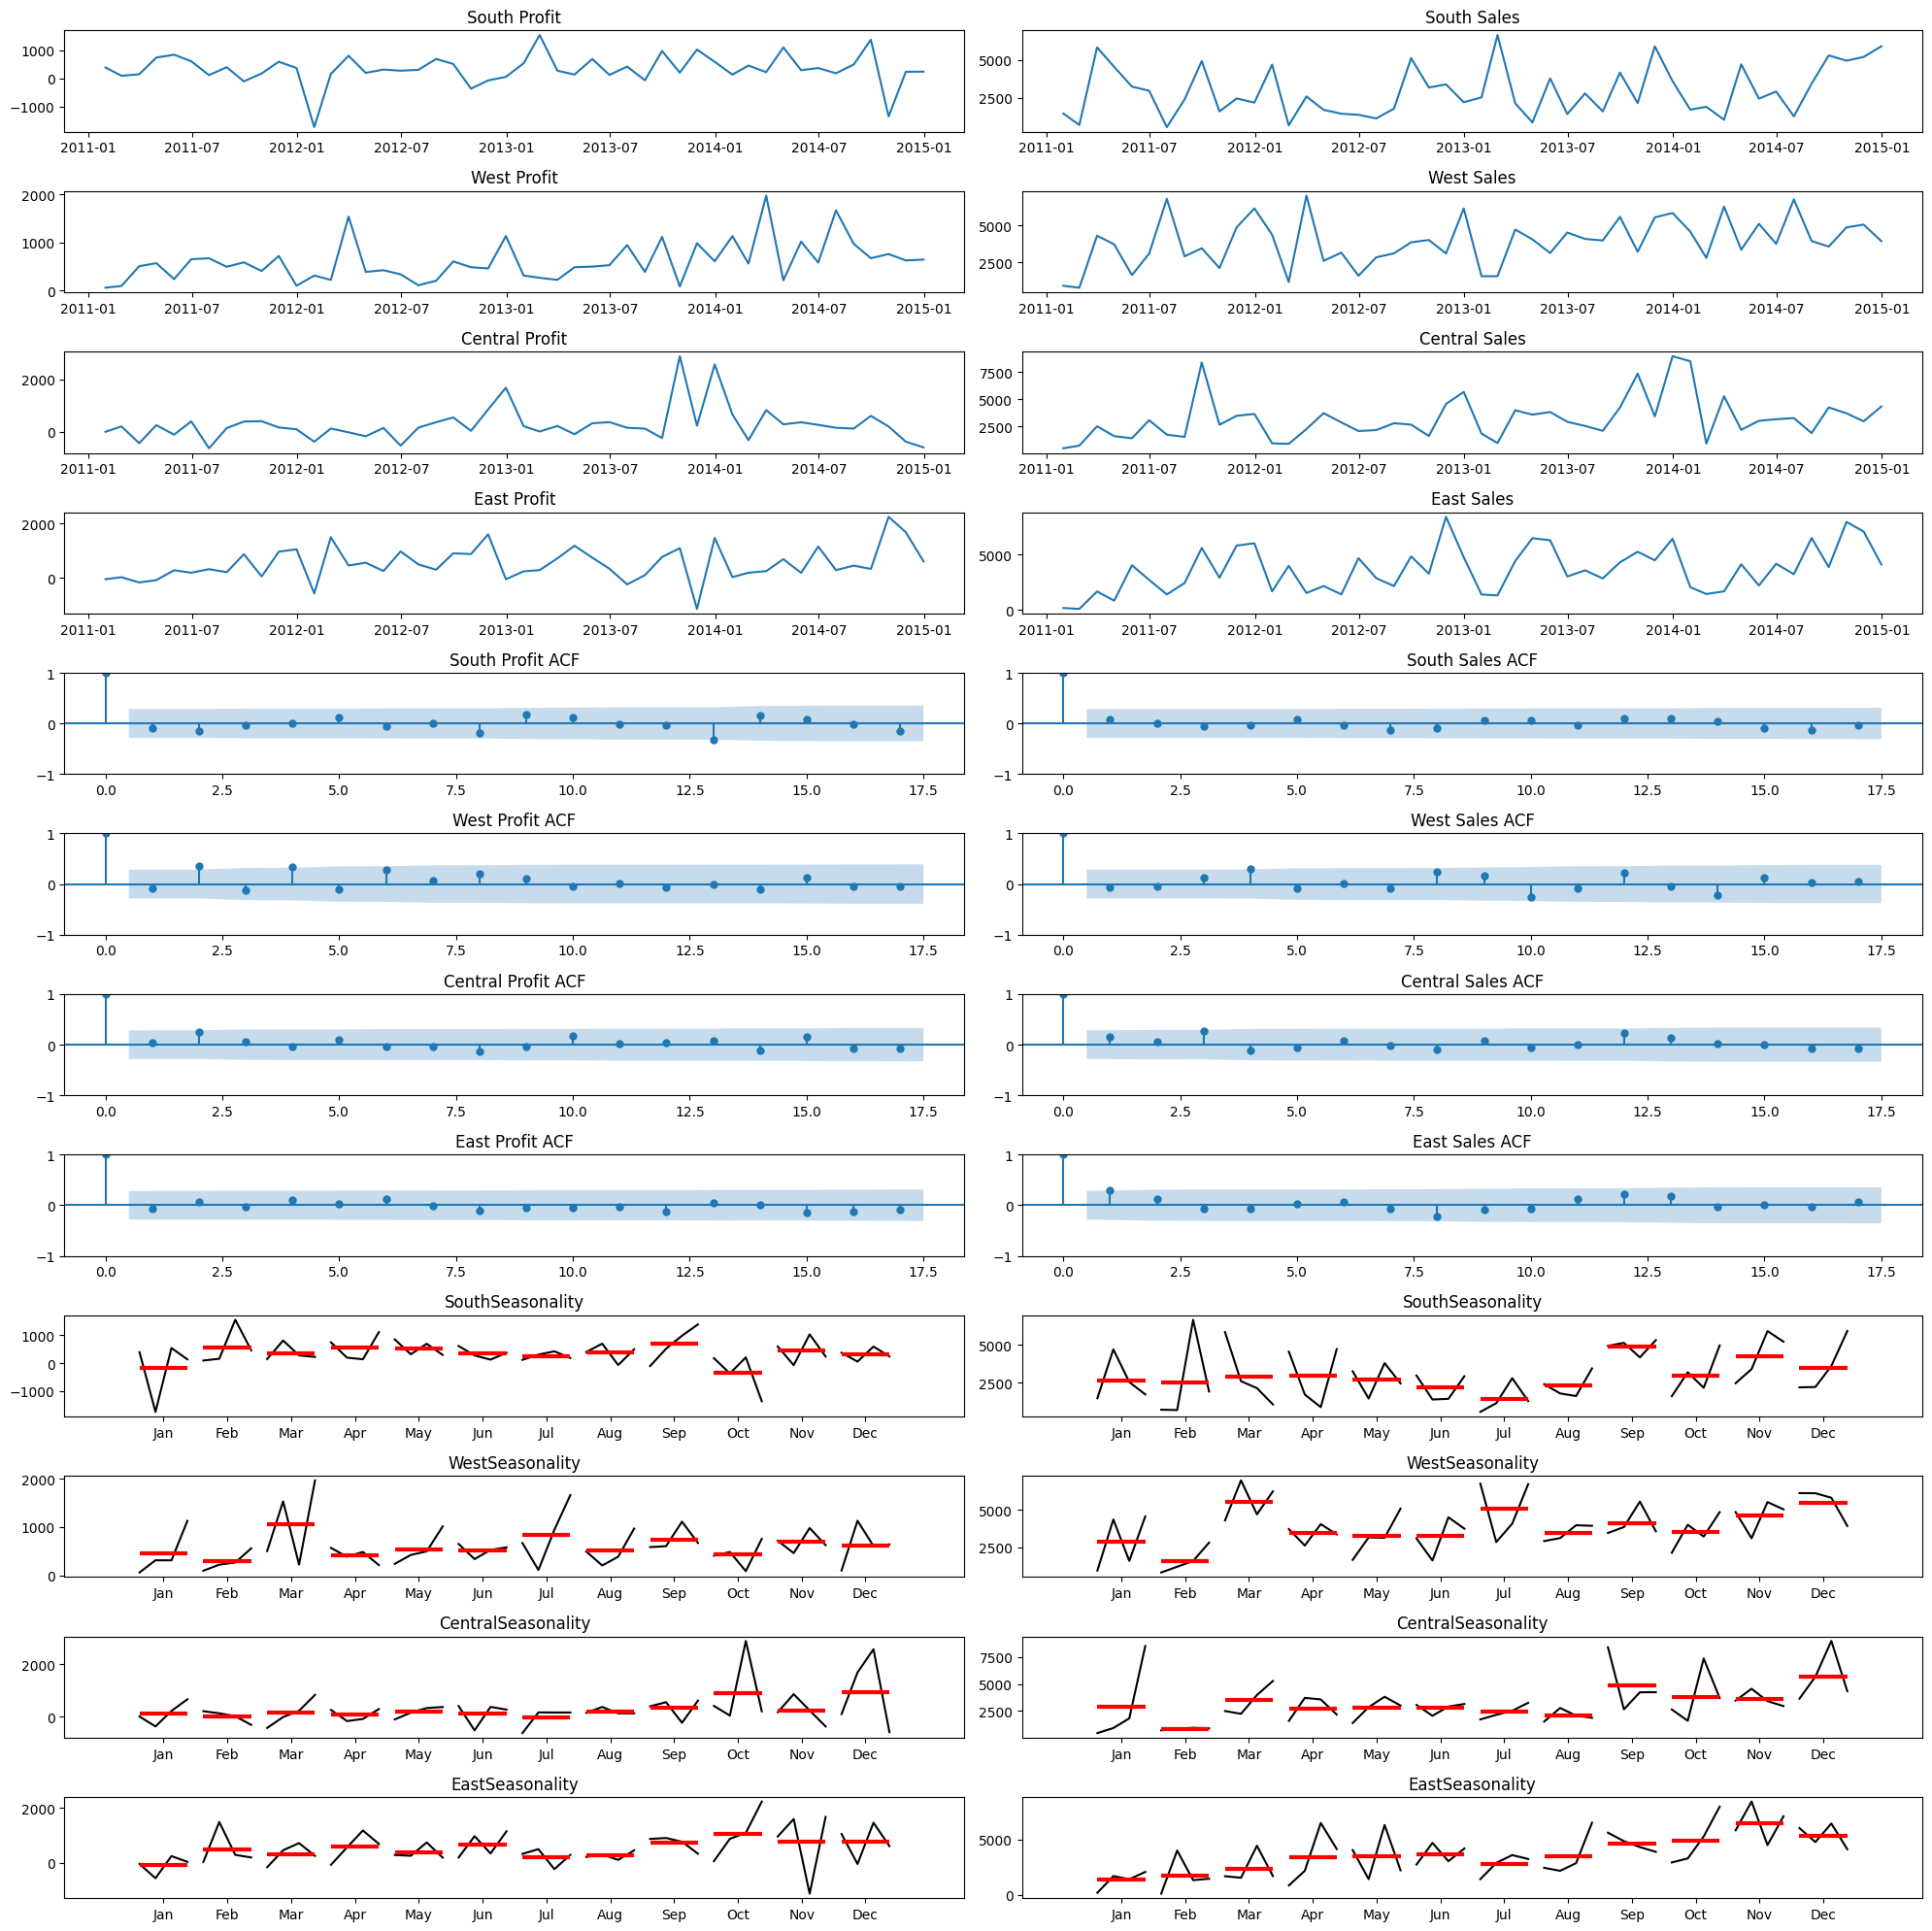

In [86]:
monthly_eda(cat_var = 'Region')